<a href="https://colab.research.google.com/github/muhammadahmed73/Final-Project/blob/main/22031216_UOH_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Final Project/Big_Black_Money_Dataset.csv")
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [4]:
df.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

#**Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [6]:
df.dtypes

,0
Transaction ID,object
Country,object
Amount (USD),float64
Transaction Type,object
Date of Transaction,object
Person Involved,object
Industry,object
Destination Country,object
Reported by Authority,bool
Source of Money,object


Changing the datatype to suitable formats

In [7]:
columns_to_convert = ['Transaction ID', 'Country', 'Transaction Type', 'Person Involved', 'Industry',
                      'Destination Country', 'Source of Money', 'Financial Institution', 'Tax Haven Country']
df[columns_to_convert] = df[columns_to_convert].astype('string')

Making a date type of the datee format which currently exists in object format

In [8]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

In [9]:
df["Amount (USD)"] = df["Amount (USD)"].astype('float')

In [10]:
df

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  string        
 1   Country                      10000 non-null  string        
 2   Amount (USD)                 10000 non-null  float64       
 3   Transaction Type             10000 non-null  string        
 4   Date of Transaction          10000 non-null  datetime64[ns]
 5   Person Involved              10000 non-null  string        
 6   Industry                     10000 non-null  string        
 7   Destination Country          10000 non-null  string        
 8   Reported by Authority        10000 non-null  bool          
 9   Source of Money              10000 non-null  string        
 10  Money Laundering Risk Score  10000 non-null  int64         
 11  Shell Companies Involved     10000 non-nul

In [12]:
df.isnull().sum()

,0
Transaction ID,0
Country,0
Amount (USD),0
Transaction Type,0
Date of Transaction,0
Person Involved,0
Industry,0
Destination Country,0
Reported by Authority,0
Source of Money,0


#**Exploratory Data Analysis**


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import random


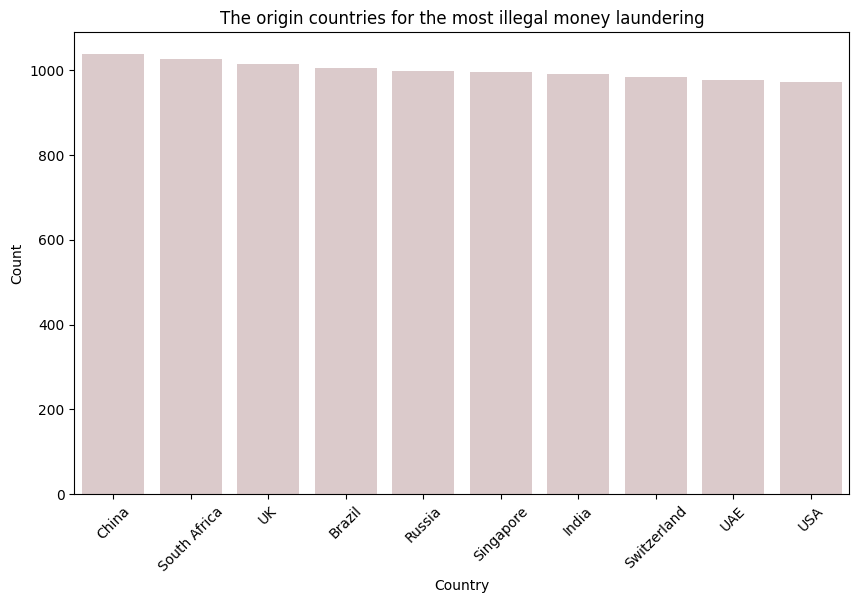

In [14]:
country_counts = df['Country'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The origin countries for the most illegal money laundering")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

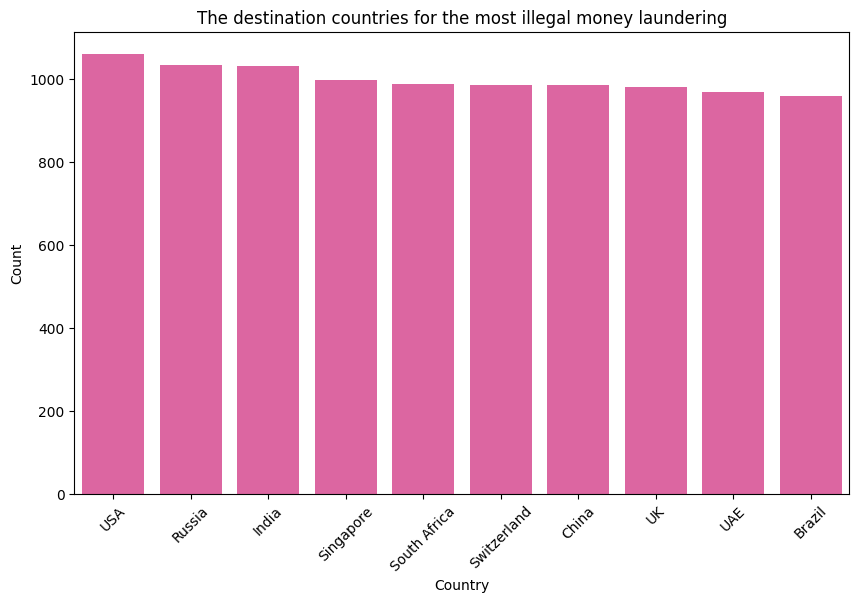

In [17]:
country_counts = df['Destination Country'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The destination countries for the most illegal money laundering")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

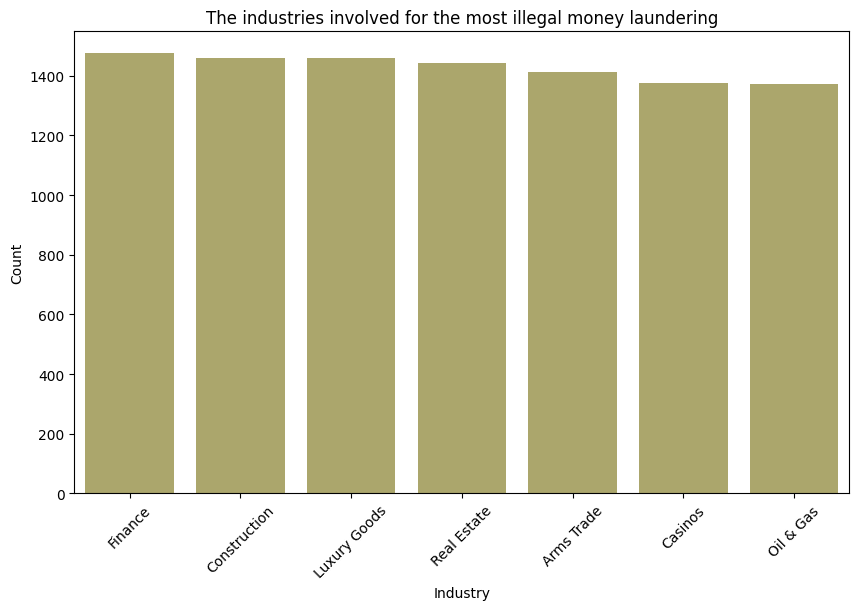

In [18]:
country_counts = df['Industry'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The industries involved for the most illegal money laundering")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

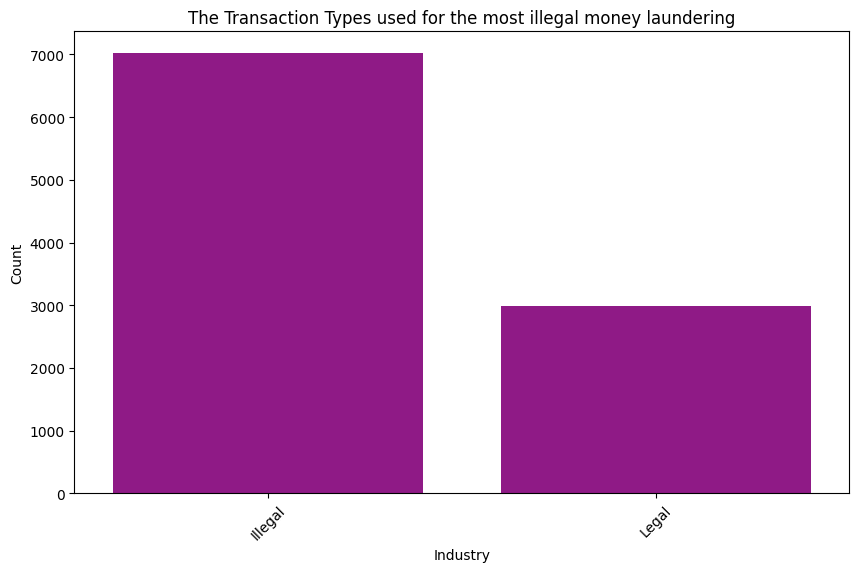

In [19]:
country_counts = df['Source of Money'].value_counts().sort_values(ascending=False)
color = "#%06x" % random.randint(0, 0xFFFFFF)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, color=color)
plt.xticks(rotation=45)
plt.title("The Transaction Types used for the most illegal money laundering")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

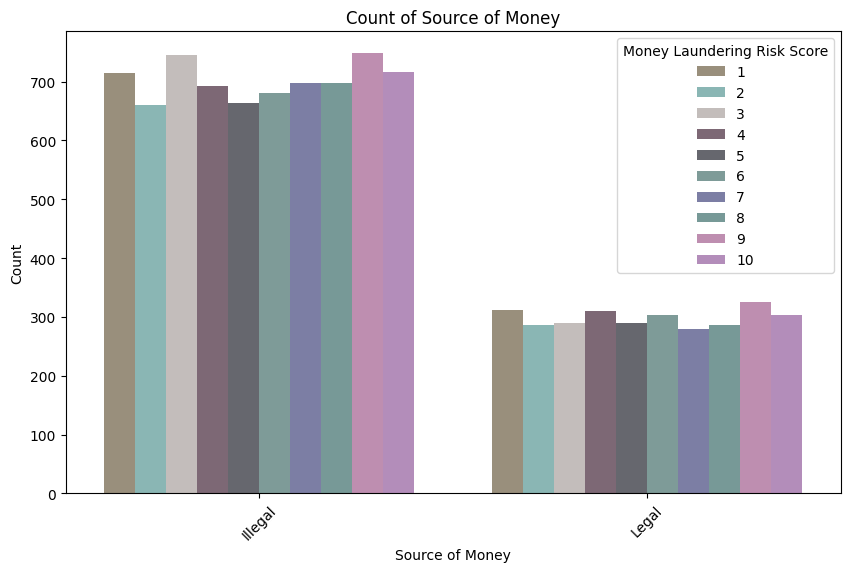

In [20]:
# Sort the DataFrame by "Money Laundering Risk Score" for ascending hue order
df_sorted = df.sort_values(by="Money Laundering Risk Score")

# Generate moderately light colors (values between 150 and 220 for each RGB component)
hue_categories = df_sorted["Money Laundering Risk Score"].nunique()
balanced_colors = ["#%02x%02x%02x" % (random.randint(100, 200), random.randint(100, 200), random.randint(100, 200)) for _ in range(hue_categories)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sorted, x="Source of Money", hue="Money Laundering Risk Score", palette=balanced_colors)
plt.xticks(rotation=45)
plt.title("Count of Source of Money")
plt.xlabel("Source of Money")
plt.ylabel("Count")
plt.show()

The plot shows the distribution of different sources of money, with varying risk scores (1 to 10), allowing for a visual assessment of the risk associated with each source.
I can observe which money sources are more likely to be associated with high-risk money laundering activities. Higher risk sources could guide authorities to focus their monitoring efforts.

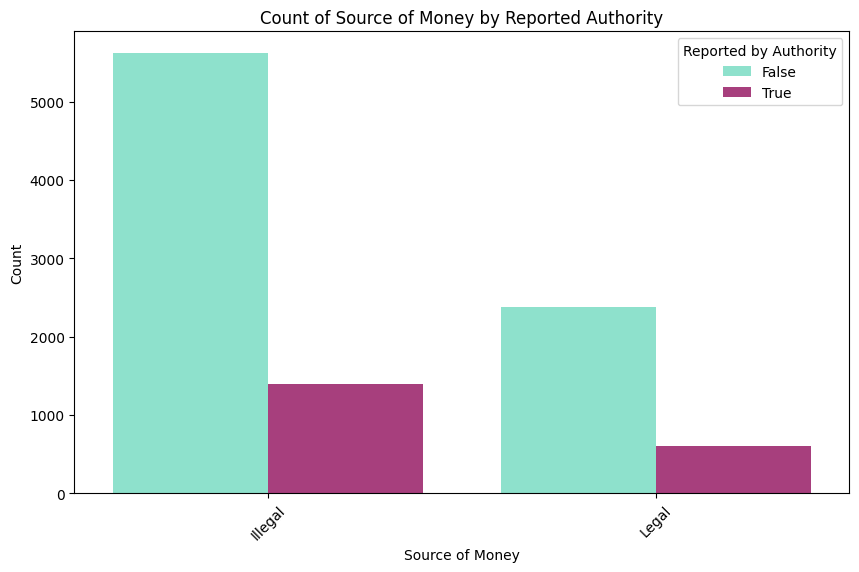

In [21]:
# Generate random colors for each hue category
hue_categories = df["Reported by Authority"].nunique()
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(hue_categories)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Source of Money", hue="Reported by Authority", palette=colors)
plt.xticks(rotation=45)
plt.title("Count of Source of Money by Reported Authority")
plt.xlabel("Source of Money")
plt.ylabel("Count")
plt.show()

The chart shows that the majority of illegal transactions are not reported to authorities.
This emphasizes a key issue in the fight against money laundering: a significant portion of illicit transactions is not flagged or reported by institutions, which might allow suspicious activities to continue undetected.

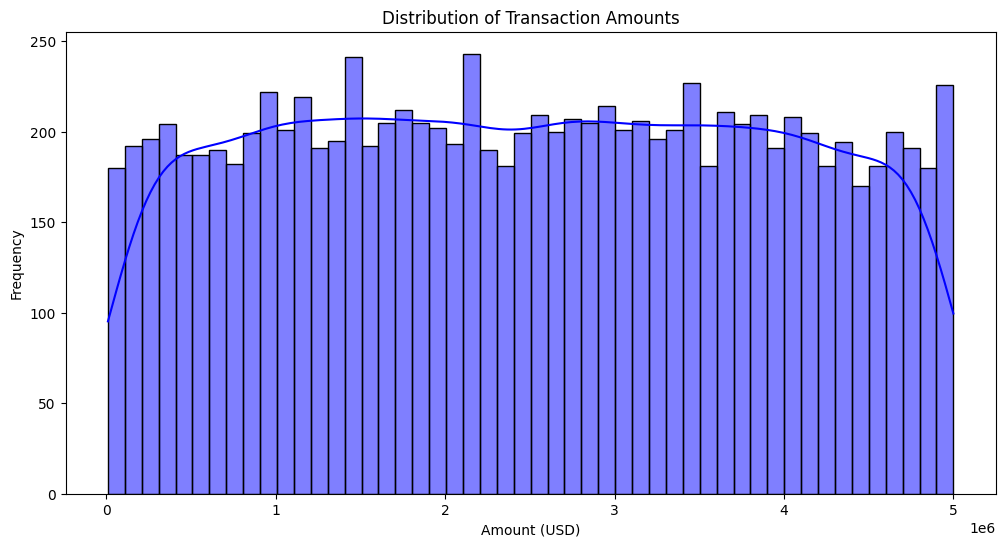

In [22]:
# Distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount (USD)'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()